<a href="https://colab.research.google.com/github/DayraGL/Alura_Store/blob/main/Challenge_Alura_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from google.colab import data_table
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

store1 = pd.read_csv(url)
store2 = pd.read_csv(url2)
store3 = pd.read_csv(url3)
store4 = pd.read_csv(url4)

store4.head(200)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Auriculares,Electrónicos,112000.0,6400.0,26/04/2020,Juan Fernandez,Medellín,5,Tarjeta de crédito,5,6.25184,-75.56359
196,Cubertería,Artículos para el hogar,43600.0,0.0,07/12/2020,Pedro Gomez,Medellín,5,Tarjeta de crédito,10,6.25184,-75.56359
197,TV LED UHD 4K,Electrónicos,2206900.0,115700.0,25/09/2022,Lucas Olivera,Bogotá,5,Tarjeta de crédito,6,4.60971,-74.08175
198,Ciencia de datos con Python,Libros,54200.0,1100.0,24/07/2021,Mariana Herrera,Medellín,5,Tarjeta de crédito,2,6.25184,-75.56359


# **Ingreso total por cada tienda**

In [25]:
total_incomes_S1 = store1['Precio'].sum()
total_incomes_S2 = store2['Precio'].sum()
total_incomes_S3 = store3['Precio'].sum()
total_incomes_S4 = store4['Precio'].sum()
total_incomes = total_incomes_S1 + total_incomes_S2 + total_incomes_S3 + total_incomes_S4

In [26]:
total_incomes_table_basic ={
   "Stores": [
       "Store 1",
        "Store 2",
        "Store 3",
        "Store 4"
   ],
    "Total Incomes per Store":[
        total_incomes_S1,
        total_incomes_S2,
        total_incomes_S3,
        total_incomes_S4
    ]
}
df_total_incomes_table_basic = pd.DataFrame(total_incomes_table_basic)
df_total_incomes_table_basic.style.format({'Total Incomes per Store': 'R${:,.2f}'})


,Stores,Total Incomes per Store
0,Store 1,"R$1,150,880,400.00"
1,Store 2,"R$1,116,343,500.00"
2,Store 3,"R$1,098,019,600.00"
3,Store 4,"R$1,038,375,700.00"


In [27]:
total_incomes_table ={
   "Stores": [
       "Store 1",
        "Store 2",
        "Store 3",
        "Store 4",
        "Total Incomes"
   ],
    "Total Incomes per Store":[
        total_incomes_S1,
        total_incomes_S2,
        total_incomes_S3,
        total_incomes_S4,
        total_incomes
    ]
}
df_total_incomes_table = pd.DataFrame(total_incomes_table)
df_total_incomes_table.style.format({'Total Incomes per Store': 'R${:,.2f}'})


,Stores,Total Incomes per Store
0,Store 1,"R$1,150,880,400.00"
1,Store 2,"R$1,116,343,500.00"
2,Store 3,"R$1,098,019,600.00"
3,Store 4,"R$1,038,375,700.00"
4,Total Incomes,"R$4,403,619,200.00"


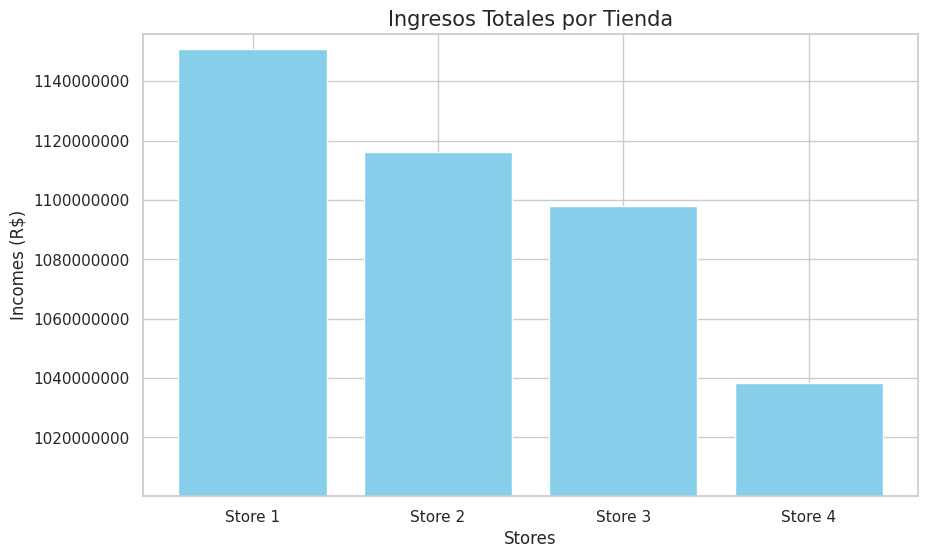

In [28]:
import seaborn as sns

sns.set_theme(style="whitegrid")
df_plot = df_total_incomes_table_basic[df_total_incomes_table_basic['Stores'] != 'Total Incomes']
plt.figure(figsize=(10, 6))
plt.bar(df_plot['Stores'], df_plot['Total Incomes per Store'], color='skyblue')
plt.title('Ingresos Totales por Tienda', fontsize=15)
plt.ylim(1000200000, df_plot['Total Incomes per Store'].max()+ 5000000)
plt.xlabel('Stores', fontsize=12)
plt.ylabel('Incomes (R$)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

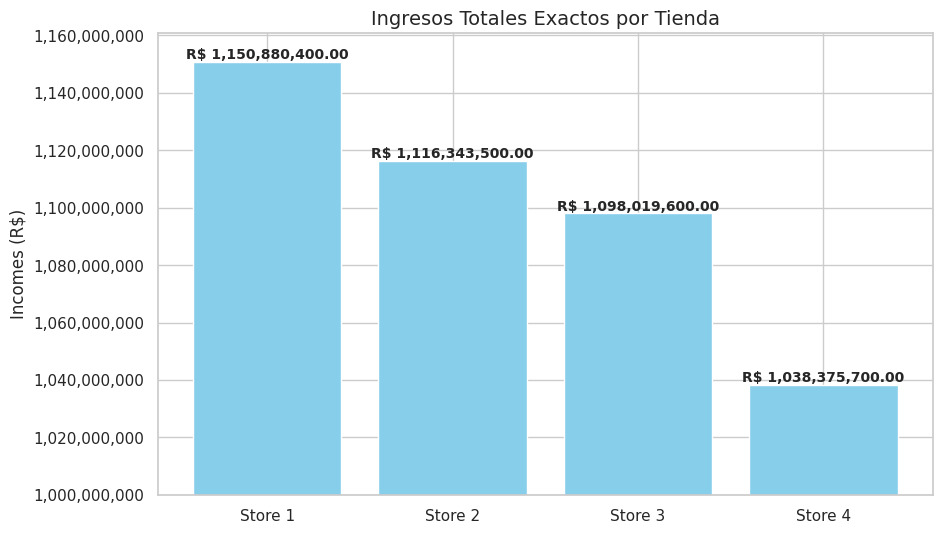

In [29]:
import matplotlib.ticker as ticker


plt.figure(figsize=(10, 6))


bars = plt.bar(df_plot['Stores'], df_plot['Total Incomes per Store'], color='skyblue')


for bar in bars:
    yval = bar.get_height()

    plt.text(bar.get_x() + bar.get_width()/2, yval,
             f'R$ {yval:,.2f}',
             va='bottom',
             ha='center',
             fontsize=10,
             fontweight='bold')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.ylim(1000000000, df_plot['Total Incomes per Store'].max() + 10000000)

plt.title('Ingresos Totales Exactos por Tienda', fontsize=14)
plt.ylabel('Incomes (R$)')
plt.show()

# **Ventas por categoría**

In [41]:
every_store = pd.concat(
    [store1, store2, store3, store4],
    keys=['Store 1', 'Store 2', 'Store 3', 'Store 4']
)
every_store = every_store.reset_index(level=0).rename(columns={'level_0': 'Tienda'})

sells_per_category = every_store.groupby("Categoría del Producto")["Producto"].count().reset_index()
sells_per_category


,Categoría del Producto,Producto
0,Artículos para el hogar,730
1,Deportes y diversión,1113
2,Electrodomésticos,1149
3,Electrónicos,1772
4,Instrumentos musicales,753
5,Juguetes,1290
6,Libros,742
7,Muebles,1886


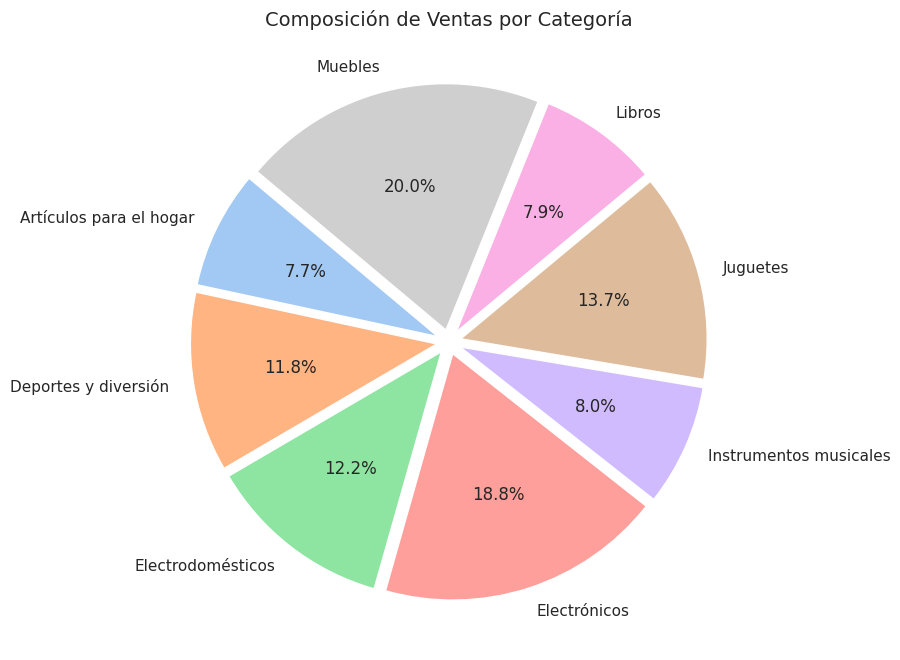

In [57]:
plt.figure(figsize=(8, 8))

# Usamos los datos de sells_per_category que ya calculaste
labels = sells_per_category['Categoría del Producto']
sizes = sells_per_category['Producto'] # Este es el conteo

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('pastel'),
        explode=[0.05] * len(labels)) # Separa un poco los trozos para legibilidad

plt.title('Composición de Ventas por Categoría', fontsize=14)
plt.show()

In [38]:

products_detail = every_store.groupby(['Categoría del Producto', 'Producto']).size().reset_index(name='Cantidad Vendida')
products_detail = products_detail.sort_values(['Categoría del Producto', 'Cantidad Vendida'], ascending=[True, False])
products_detail

,Categoría del Producto,Producto,Cantidad Vendida
2,Artículos para el hogar,Set de ollas,200
0,Artículos para el hogar,Cubertería,189
1,Artículos para el hogar,Olla de presión,172
3,Artículos para el hogar,Set de vasos,169
4,Deportes y diversión,Balón de baloncesto,197
6,Deportes y diversión,Bicicleta,196
9,Deportes y diversión,Vaso térmico,187
7,Deportes y diversión,Cuerda para saltar,186
5,Deportes y diversión,Balón de voleibol,184
8,Deportes y diversión,Mochila,163


# **Valoración media por tienda**

In [42]:
calification_per_store = every_store.groupby('Tienda')['Calificación'].mean().reset_index()
calification_per_store.columns = ['Tienda', 'Valoración Media']
calification_per_store = calification_per_store.sort_values(by='Valoración Media', ascending=False)
calification_per_store['Valoración Media'] = calification_per_store['Valoración Media'].round(2)
calification_per_store

,Tienda,Valoración Media
2,Store 3,4.05
1,Store 2,4.04
3,Store 4,4.00
0,Store 1,3.98


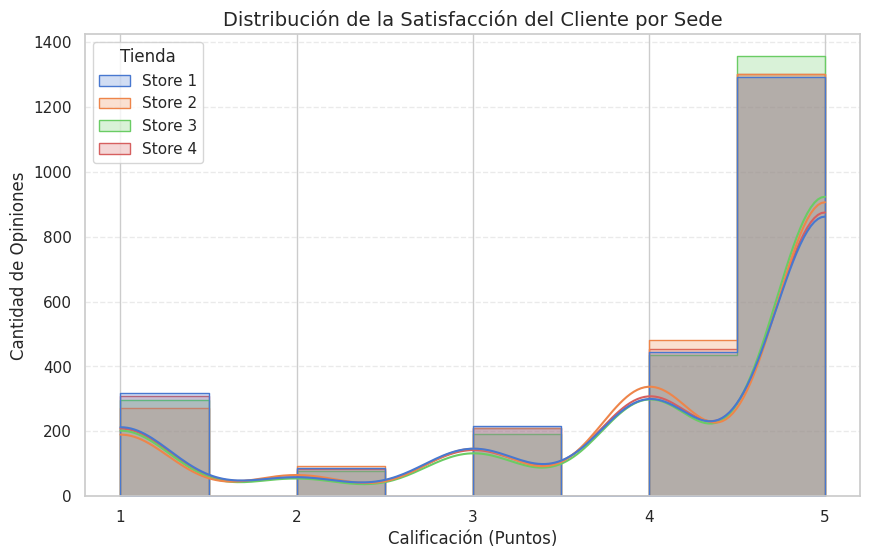

In [73]:
plt.figure(figsize=(10, 6))

# Usamos un Histograma para ver la frecuencia de las notas
sns.histplot(data=every_store, x='Calificación', hue='Tienda',
             kde=True, element="step", palette='muted', binwidth=0.5)

plt.title('Distribución de la Satisfacción del Cliente por Sede', fontsize=14)
plt.xlabel('Calificación (Puntos)')
plt.ylabel('Cantidad de Opiniones')
plt.xticks([1, 2, 3, 4, 5]) # Aseguramos que se vean los puntos de la escala
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

# **Valor del envío promedio por tienda**

In [51]:
delivery_average_per_store = every_store.groupby('Tienda')['Costo de envío'].mean().reset_index()
delivery_average_per_store.columns = ['Tienda', 'Costo del Envío Promedio']
delivery_average_per_store = delivery_average_per_store.sort_values(by='Costo del Envío Promedio', ascending=False)
delivery_average_per_store['Costo del Envío Promedio'] = delivery_average_per_store['Costo del Envío Promedio'].round(2)
delivery_average_per_store.style.format({'Costo del Envío Promedio': 'R${:,.2f}'})

,Tienda,Costo del Envío Promedio
0,Store 1,"R$26,018.61"
1,Store 2,"R$25,216.24"
2,Store 3,"R$24,805.68"
3,Store 4,"R$23,459.46"


/tmp/ipython-input-431832118.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Tienda', y='Costo del Envío Promedio', data=delivery_average_per_store, palette='viridis')


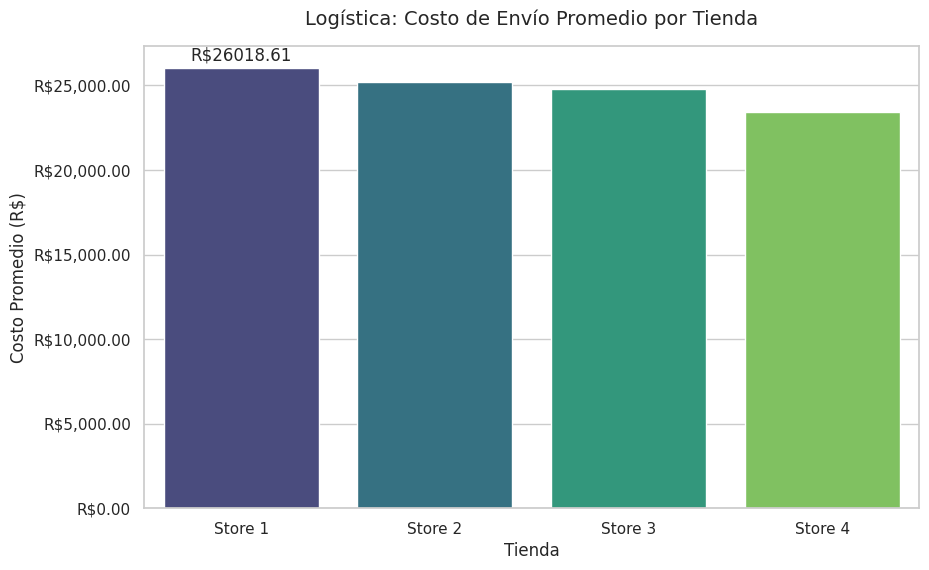

In [56]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='Tienda', y='Costo del Envío Promedio', data=delivery_average_per_store, palette='viridis')

formatter = ticker.StrMethodFormatter('R${x:,.2f}')
plt.gca().yaxis.set_major_formatter(formatter)
ax1.bar_label(ax1.containers[0], fmt='R$%.2f', padding=3)

plt.title('Logística: Costo de Envío Promedio por Tienda', fontsize=14, pad=15)
plt.ylabel('Costo Promedio (R$)')
plt.show()

# **Productos más vendidos y menos vendidos**

In [53]:
sell_detail = every_store.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad Vendida')

most_sold_products = sell_detail.loc[sell_detail.groupby('Tienda')['Cantidad Vendida'].idxmax()]
less_sold_products =sell_detail.loc[sell_detail.groupby('Tienda')['Cantidad Vendida'].idxmin()]

print("Productos más vendidos:")
most_sold_products

Productos más vendidos:


,Tienda,Producto,Cantidad Vendida
1,Store 1,Armario,60
75,Store 2,Iniciando en programación,65
129,Store 3,Kit de bancas,57
163,Store 4,Cama box,62


# **Análisis del desempeño geográfico**

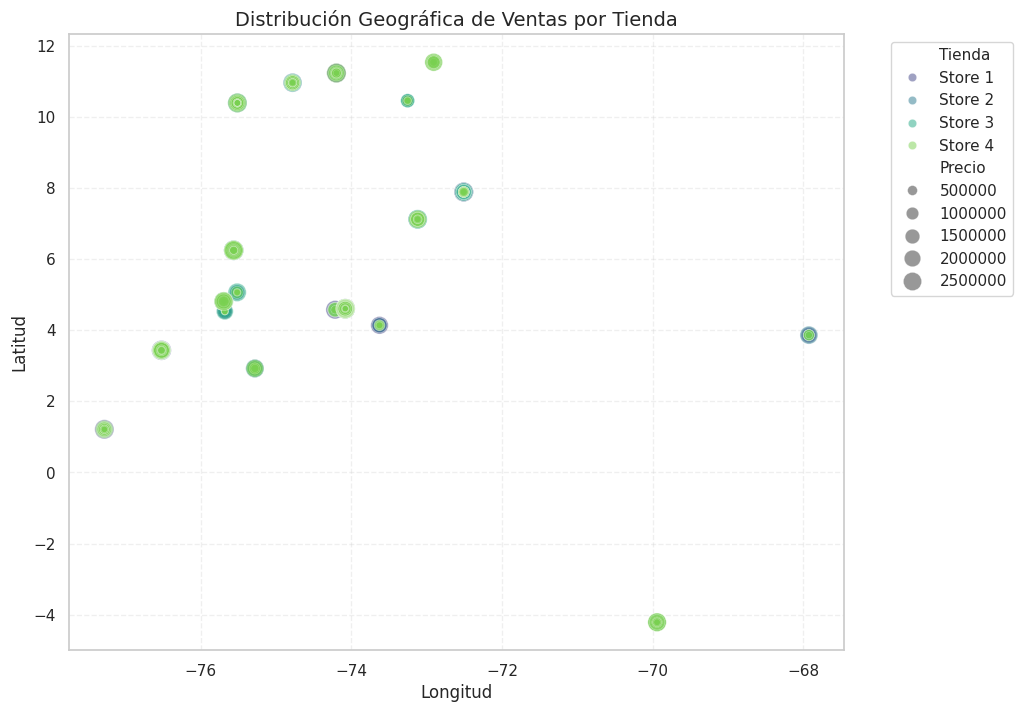

In [75]:
plt.figure(figsize=(10, 8))

# Graficamos lon en X y lat en Y
sns.scatterplot(data=every_store, x='lon', y='lat',
                hue='Tienda', size='Precio',
                sizes=(20, 200), alpha=0.5, palette='viridis')

plt.title('Distribución Geográfica de Ventas por Tienda', fontsize=14)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [80]:
import folium
from folium.plugins import HeatMap

# 1. Calculamos el centro del mapa usando el promedio de latitud y longitud
lat_promedio = every_store['lat'].mean()
long_promedio = every_store['lon'].mean()

# 2. Creamos el objeto mapa
# 'tiles' puede ser 'OpenStreetMap', 'CartoDB positron' o 'CartoDB dark_matter'
map_ = folium.Map(location=[lat_promedio, long_promedio], zoom_start=4, tiles='CartoDB positron')

# 3. Preparamos los datos para el HeatMap (lista de listas: [lat, lon])
data_calor = every_store[['lat', 'lon']].dropna().values.tolist()

# 4. Añadimos la capa de calor al mapa
HeatMap(data_calor, radius=15, blur=10, min_opacity=0.5).add_to(map_)


map_

In [48]:
#plt.figure(figsize=(10, 8))
#sns.barplot(x='Valoración Media', y='Producto', data = product_calification.head(10), palette='RdYlGn')
#plt.title('Top 10 Productos Mejor Calificados')
#plt.xlim(0, 5) # La escala de calificación aqui es de 0 a 5
#plt.show()

In [49]:
#product_calification = every_store.groupby(['Producto'])['Calificación'].mean().reset_index()
#product_calification.columns = ['Producto', 'Valoración Media']
#product_calification['Valoración Media'] = product_calification['Valoración Media'].round(2)
#product_calification